In [1]:
import os

os.chdir("../")

In [2]:
from prompt_classifier.datasets import load_datasets
from prompt_classifier.plots import plot_common_words, plot_word_count


c:\Users\risko\miniconda3\envs\prompt-classification\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
law_df, finance_df, healthcare_df, general_df = load_datasets()

c:\Users\risko\miniconda3\envs\prompt-classification\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\risko\.cache\huggingface\hub\datasets--4DR1455--finance_questions. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating train split: 100%|██████████| 53937/53937 [00:00<00:00, 74025.29 examples/s]


In [4]:
def extract_user_content(messages: list) -> str:
    user_content = [msg["content"] for msg in messages if msg["role"] == "user"]
    return ' '.join(user_content)

In [5]:
finance_df['prompt'] = finance_df['instruction']
os.makedirs('data/interim', exist_ok=True)
os.makedirs('data/processed', exist_ok=True)

In [6]:
finance_df = finance_df.dropna(subset=['prompt'])
finance_df = finance_df.replace('\n', '', regex=True)
finance_df = finance_df[general_df['prompt'] != '']
finance_df['label'] = 1
finance_df[['prompt', 'label']].to_csv('data/interim/finance_prompts.csv', index=False)

C:\Users\risko\AppData\Local\Temp\ipykernel_16040\340821238.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  finance_df = finance_df[general_df['prompt'] != '']


In [7]:
general_df = general_df.dropna(subset=['prompt'])
general_df = general_df.replace('\n', '', regex=True)
general_df = general_df[general_df['prompt'] != '']
general_df['label'] = 0
general_df[['prompt', 'label']].to_csv('data/interim/general_prompts.csv', index=False)

In [8]:
healthcare_df['prompt'] = healthcare_df['input']
healthcare_df = healthcare_df.dropna(subset=['prompt'])
healthcare_df = healthcare_df.replace('\n', '', regex=True)
healthcare_df = healthcare_df[healthcare_df['prompt'] != '']
healthcare_df['label'] = 1
healthcare_df[['prompt', 'label']].to_csv('data/interim/healthcare_prompts.csv', index=False)

In [9]:
law_df['label'] = 1
law_df = law_df.dropna(subset=['prompt'])
law_df = law_df.replace('\n', '', regex=True)
law_df = law_df[law_df['prompt'] != '']
law_df['label'] = 1
law_df[['prompt', 'label']].to_csv('data/interim/law_prompts.csv', index=False)

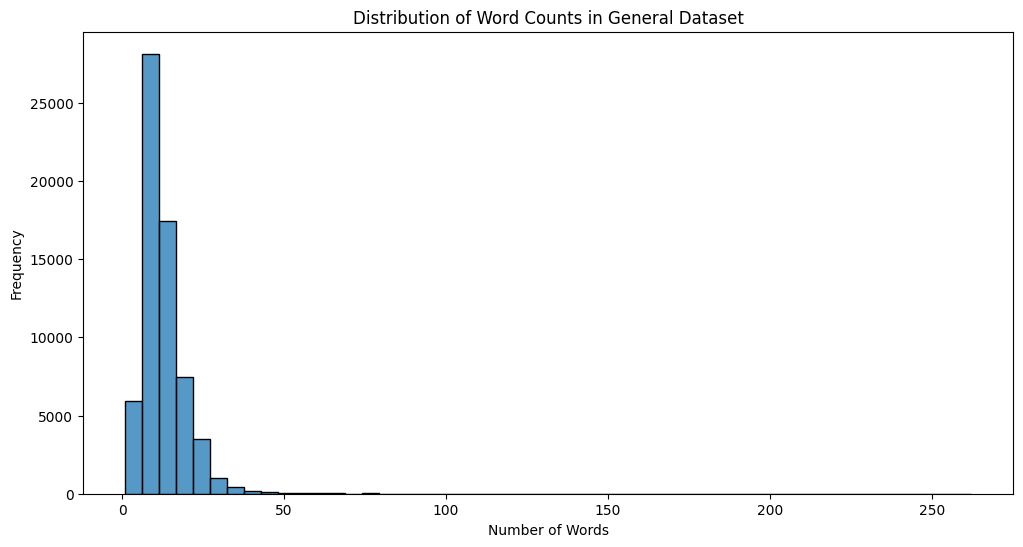

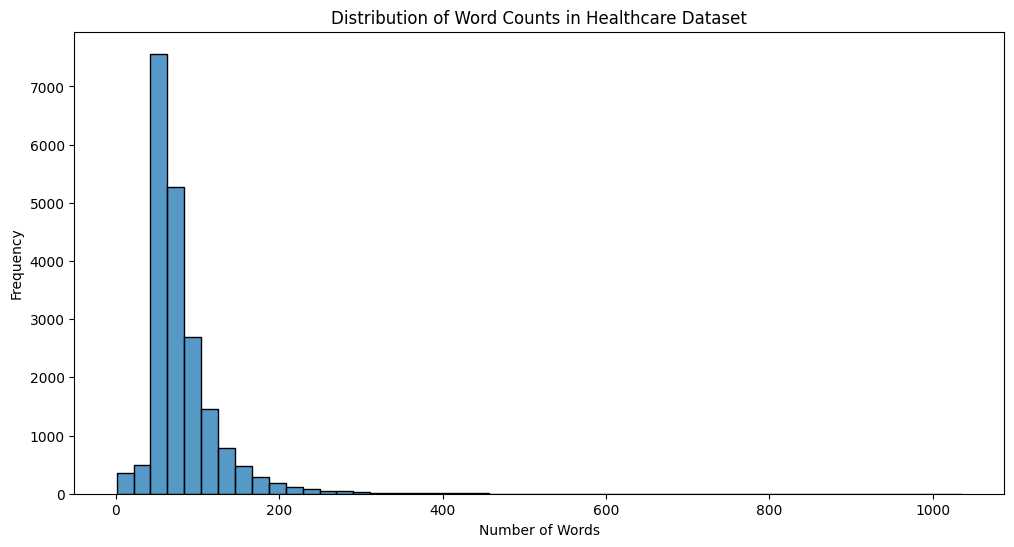

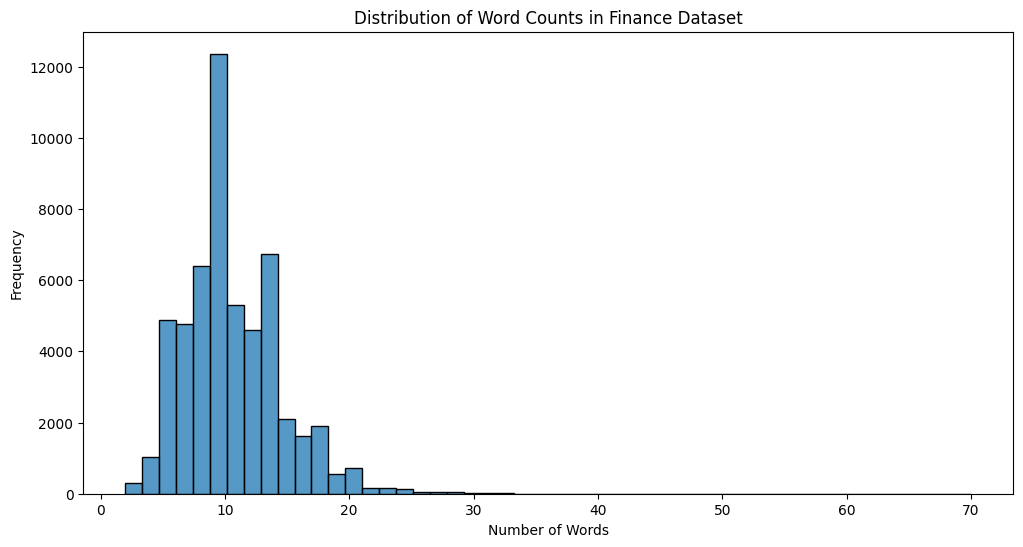

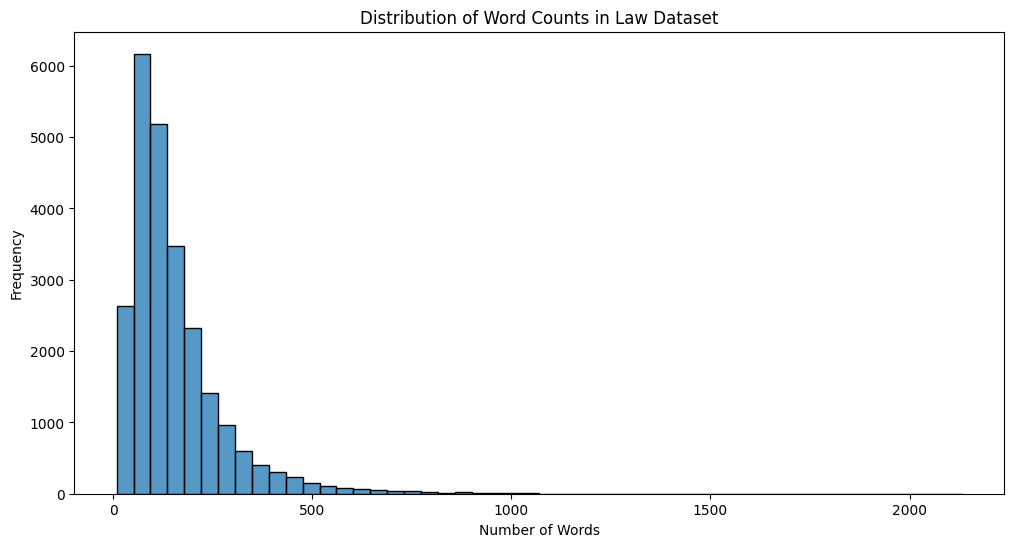

In [10]:
plot_word_count(general_df, 'General')
plot_word_count(healthcare_df, 'Healthcare')
plot_word_count(finance_df, 'Finance')
plot_word_count(law_df, 'Law')

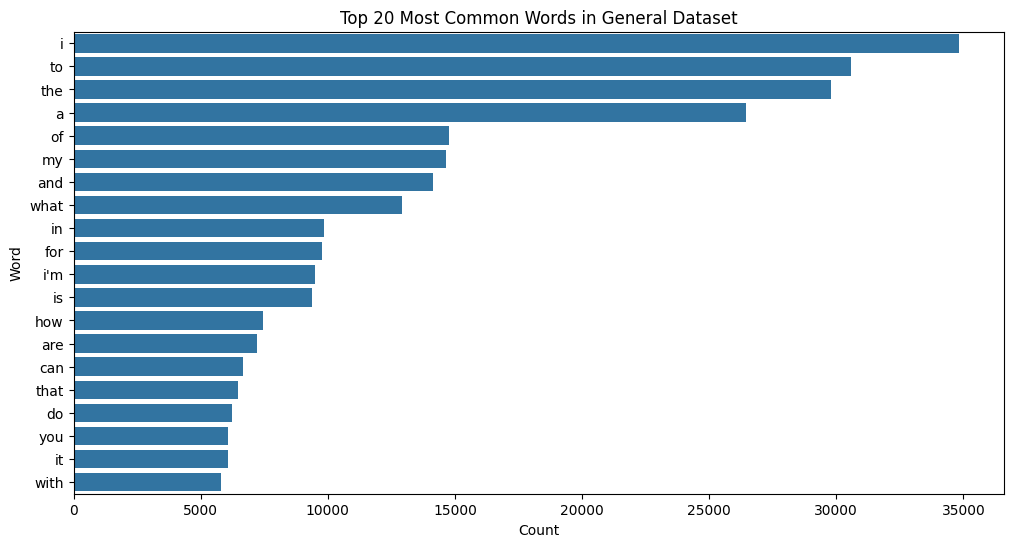

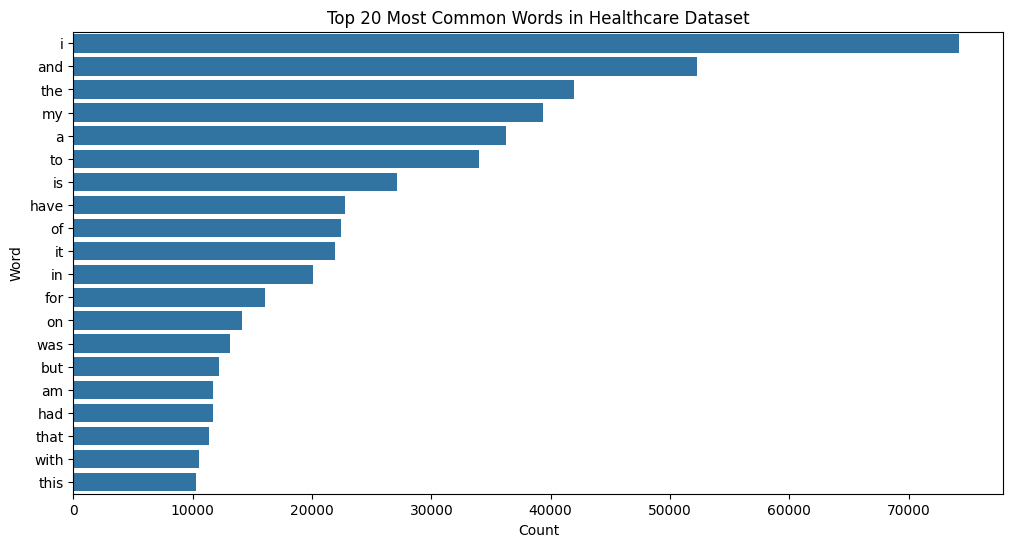

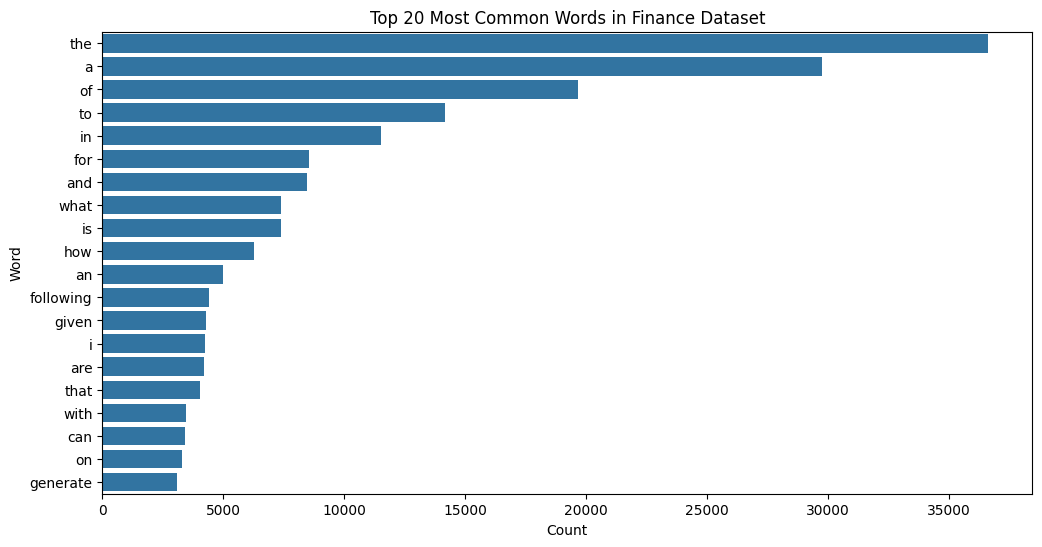

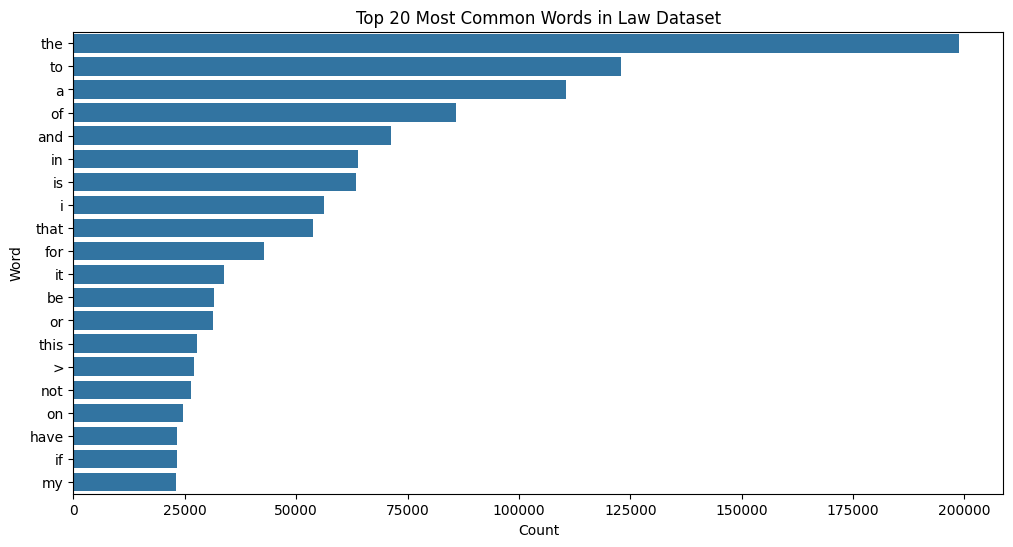

In [11]:
plot_common_words(general_df, 'General')
plot_common_words(healthcare_df, 'Healthcare')
plot_common_words(finance_df, 'Finance')
plot_common_words(law_df, 'Law')